# Assignment 2

 Apply Logistic Regression and Linear Discriminative Analysis to a real-world application. You can create your own data or obtain it from internet resources. Implement the following operations:

1.	Logistic Regression

    a)	Apply Logistic Regression.

    b)	Calculate Standard error, Z-statistic and p-value for each coefficient.

    c)	Is there confounding variable?

    d)	Apply Logistic regression with more than two classes (if any)



2.	Discriminative Analysis

    a)	Apply Linear Discriminative Analysis.

    b)	Define effective threshold for your model.

    c)	Draw ROC curve.

    d)	Apply Quadratic Discriminative Analysis (QDA).



3.	Apply Naïve Bayes algorithms. Compare LR, LDA, QDA and NB

4.	Compare Linear and Poisson Regression Model



## Dataset Overview

The dataset contains 15,000 employee records designed for multi-class attrition risk prediction.

The target variable, Attrition_Risk_Level, is categorized into three classes: Low (0), Medium (1), and High (2) risk.

Features include demographic (Age, Gender, Education), compensation (Monthly_Income, Job_Role), engagement (Job_Satisfaction, Work_Life_Balance), workload (Num_Projects, Avg_Monthly_Hours), and career progression metrics (Years_at_Company, Promotions, Training).

The dataset is complete with no missing values, consists of 15 variables, and contains a mix of integer, float, and categorical data types.

Class distribution is moderately imbalanced: 50% Low Risk, 35% Medium Risk, and 15% High Risk.


# Kaggle Dataset Load & Analysis

In [ ]:
# Install dependencies as needed:
# pip install kagglehub[pandas-datasets]
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Set the path to the file you'd like to load
file_path = "hr_employee_attrition_data.csv"

# Load the latest version
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "bertnardomariouskono/hr-analytics-employee-attrition-and-risk-levels",
  file_path,
  # Provide any additional arguments like
  # sql_query or pandas_kwargs. See the
  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)

print("First 5 records:", df.head())

/tmp/ipython-input-2186258427.py:10: DeprecationWarning: Use dataset_load() instead of load_dataset(). load_dataset() will be removed in a future version.
  df = kagglehub.load_dataset(


Using Colab cache for faster access to the 'hr-analytics-employee-attrition-and-risk-levels' dataset.
First 5 records:   Employee_ID  Age  Gender           Job_Role  Monthly_Income  \
0   EMP-00001   28    Male            Manager            5873   
1   EMP-00002   45    Male     Data Scientist           11651   
2   EMP-00003   44  Female  Software Engineer            8936   
3   EMP-00004   22  Female     Data Scientist            6861   
4   EMP-00005   23  Female     Data Scientist            6209   

   Job_Satisfaction  Work_Life_Balance  Distance_From_Home_KM  Num_Projects  \
0                 2                  4                   20.5             5   
1                 3                  2                    3.3             2   
2                 4                  3                   17.3             8   
3                 3                  3                    3.8             6   
4                 4                  1                    5.6             6   

   Avg_Monthly_

In [ ]:


df.head()

,Employee_ID,Age,Gender,Job_Role,Monthly_Income,Job_Satisfaction,Work_Life_Balance,Distance_From_Home_KM,Num_Projects,Avg_Monthly_Hours,Years_at_Company,Years_Since_Last_Promotion,Training_Times_Last_Year,Education_Level,Attrition_Risk_Level
0,EMP-00001,28,Male,Manager,5873,2,4,20.5,5,193.6,4,4,2,2,1
1,EMP-00002,45,Male,Data Scientist,11651,3,2,3.3,2,170.1,5,4,2,3,1
2,EMP-00003,44,Female,Software Engineer,8936,4,3,17.3,8,164.4,6,3,6,1,0
3,EMP-00004,22,Female,Data Scientist,6861,3,3,3.8,6,178.3,0,0,0,3,0
4,EMP-00005,23,Female,Data Scientist,6209,4,1,5.6,6,130.4,1,0,3,5,0


In [ ]:
df.describe()

,Age,Monthly_Income,Job_Satisfaction,Work_Life_Balance,Distance_From_Home_KM,Num_Projects,Avg_Monthly_Hours,Years_at_Company,Years_Since_Last_Promotion,Training_Times_Last_Year,Education_Level,Attrition_Risk_Level
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,34.545667,8187.693667,2.906067,2.698333,10.044493,4.991667,170.435213,6.834800,3.424800,2.995933,2.998267,0.650000
std,7.766411,1883.658716,0.937284,0.895945,7.090279,1.990643,24.382219,6.126283,4.189946,1.994237,1.104572,0.726316
min,20.000000,3000.000000,1.000000,1.000000,1.000000,2.000000,120.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,29.000000,6804.500000,2.000000,2.000000,4.800000,3.000000,153.700000,2.000000,0.000000,1.000000,2.000000,0.000000
50%,34.000000,8197.000000,3.000000,3.000000,8.300000,5.000000,169.900000,5.000000,2.000000,3.000000,3.000000,0.500000
75%,40.000000,9543.000000,4.000000,3.000000,13.600000,7.000000,186.900000,10.000000,5.000000,5.000000,4.000000,1.000000
max,60.000000,14497.000000,4.000000,4.000000,50.000000,8.000000,250.000000,37.000000,33.000000,6.000000,5.000000,2.000000


In [ ]:
df.dtypes

,0
Employee_ID,object
Age,int64
Gender,object
Job_Role,object
Monthly_Income,int64
Job_Satisfaction,int64
Work_Life_Balance,int64
Distance_From_Home_KM,float64
Num_Projects,int64
Avg_Monthly_Hours,float64


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Employee_ID                 15000 non-null  object 
 1   Age                         15000 non-null  int64  
 2   Gender                      15000 non-null  object 
 3   Job_Role                    15000 non-null  object 
 4   Monthly_Income              15000 non-null  int64  
 5   Job_Satisfaction            15000 non-null  int64  
 6   Work_Life_Balance           15000 non-null  int64  
 7   Distance_From_Home_KM       15000 non-null  float64
 8   Num_Projects                15000 non-null  int64  
 9   Avg_Monthly_Hours           15000 non-null  float64
 10  Years_at_Company            15000 non-null  int64  
 11  Years_Since_Last_Promotion  15000 non-null  int64  
 12  Training_Times_Last_Year    15000 non-null  int64  
 13  Education_Level             150

In [ ]:
df['Job_Role'].unique()

array(['Manager', 'Data Scientist', 'Software Engineer',
       'Sales Executive', 'HR Specialist', 'Analyst'], dtype=object)

In [ ]:
df['Attrition_Risk_Level'].unique()

array([1, 0, 2])

# Data Preprocessing

In [ ]:
import pandas as pd

df = df.drop(columns=['Employee_ID'])

# Binary encode Gender
df['Gender'] = df['Gender'].map({'Female': 0, 'Male': 1})

# One-hot encode Job_Role
job_role_dummies = pd.get_dummies(df['Job_Role'], prefix='JobRole', drop_first=True)
df = pd.concat([df.drop('Job_Role', axis=1), job_role_dummies], axis=1)


In [ ]:
# Making sure no duplicates present in dataset
df = df.drop_duplicates()

In [ ]:
import numpy as np
from scipy import stats

# Columns to check for outliers
cols = [
    'Age',
    'Monthly_Income',
    'Distance_From_Home_KM',
    'Avg_Monthly_Hours',
    'Years_at_Company',
    'Num_Projects'
]

def detect_outliers_iqr(df, columns):
    outlier_summary = []

    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]

        outlier_summary.append({
            'Variable': col,
            'Lower_Bound': lower_bound,
            'Upper_Bound': upper_bound,
            'Number_of_Outliers': len(outliers),
            'Percentage_Outliers': round(len(outliers) / len(df) * 100, 2)
        })

    return pd.DataFrame(outlier_summary)

iqr_results = detect_outliers_iqr(df, cols)
iqr_results

,Variable,Lower_Bound,Upper_Bound,Number_of_Outliers,Percentage_Outliers
0,Age,12.50,56.50,48,0.32
1,Monthly_Income,2696.75,13650.75,12,0.08
2,Distance_From_Home_KM,-8.40,26.80,438,2.92
3,Avg_Monthly_Hours,103.90,236.70,59,0.39
4,Years_at_Company,-10.00,22.00,288,1.92
5,Num_Projects,-3.00,13.00,0,0.00


In [ ]:
# Looking at degree of column skews
df[cols].skew()

,0
Age,0.181706
Monthly_Income,0.024022
Distance_From_Home_KM,1.393132
Avg_Monthly_Hours,0.124807
Years_at_Company,1.022731
Num_Projects,-0.005487


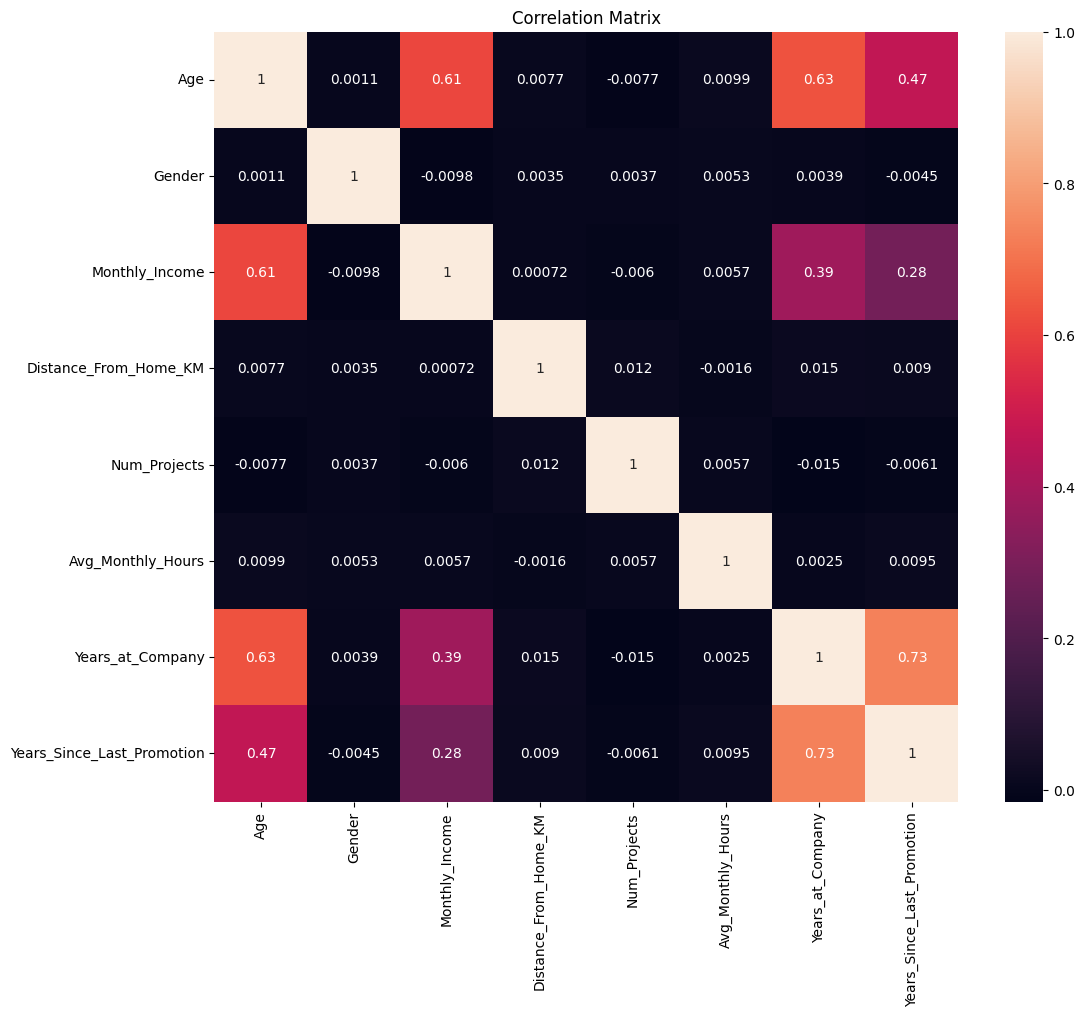

In [ ]:
# Looking for correlation in features
import seaborn as sns
import matplotlib.pyplot as plt

cols = ['Age', 'Gender', 'Monthly_Income', 'Distance_From_Home_KM', 'Num_Projects', 'Avg_Monthly_Hours', 'Years_at_Company', 'Years_Since_Last_Promotion']


corr_matrix = df[cols].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True)
plt.title("Correlation Matrix")
plt.show()


In [ ]:
# Splitting for train/test sets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df.drop(columns=['Attrition_Risk_Level'])
y = df['Attrition_Risk_Level']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [ ]:
# Normalizing columns to fit into a standard scale
from sklearn.preprocessing import StandardScaler

scale_cols = [
    'Age',
    'Monthly_Income',
    'Distance_From_Home_KM',
    'Avg_Monthly_Hours',
    'Years_at_Company',
    'Years_Since_Last_Promotion'
]

scaler = StandardScaler()
X_train[scale_cols] = scaler.fit_transform(X_train[scale_cols])
X_test[scale_cols] = scaler.transform(X_test[scale_cols])

In [ ]:
# Making sure target values are integer
y_train = y_train.astype(int)
y_test = y_test.astype(int)

In [ ]:
# Looking at dataset balance
y_train.value_counts(normalize=True)

,proportion
Attrition_Risk_Level,
0,0.50
1,0.35
2,0.15


# Two-class Logistic Regression

In [ ]:
import statsmodels.api as sm

X = X_train.copy()
y = y_train.copy()

In [ ]:
import statsmodels.api as sm

# Binary target: High risk vs Others
y_binary = (y == 2).astype(int)

X_bin = X[['Age', 'Gender', 'Monthly_Income','Job_Satisfaction', 'Work_Life_Balance', 'Distance_From_Home_KM', 'Num_Projects', 'Avg_Monthly_Hours', 'Years_at_Company']]

X_bin = sm.add_constant(X_bin)

logit_model = sm.Logit(y_binary, X_bin)
res_bin = logit_model.fit()

print(res_bin.summary())

Optimization terminated successfully.
         Current function value: 0.255385
         Iterations 8
                            Logit Regression Results                            
Dep. Variable:     Attrition_Risk_Level   No. Observations:                12000
Model:                            Logit   Df Residuals:                    11990
Method:                             MLE   Df Model:                            9
Date:                  Mon, 23 Feb 2026   Pseudo R-squ.:                  0.3958
Time:                          16:35:28   Log-Likelihood:                -3064.6
converged:                         True   LL-Null:                       -5072.5
Covariance Type:              nonrobust   LLR p-value:                     0.000
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     1.5873      0.164      9.707      0.000     

In [ ]:
X_test_binary = X_test[['Age', 'Gender', 'Monthly_Income','Job_Satisfaction', 'Work_Life_Balance', 'Distance_From_Home_KM', 'Num_Projects', 'Avg_Monthly_Hours', 'Years_at_Company']]
X_test_binary = sm.add_constant(X_test_binary)

In [ ]:
from sklearn.metrics import accuracy_score
y_test_binary = (y_test == 2).astype(int)

y_prob = res_bin.predict(X_test_binary)

y_pred = (y_prob >= 0.5).astype(int)

accuracy = accuracy_score(y_test_binary, y_pred)
accuracy

0.8836666666666667

# Multiclass Logistic Regression (with and without Confounding Variable)

In [ ]:
X_multiclass1 = X[['Age', 'Gender', 'Monthly_Income','Job_Satisfaction', 'Work_Life_Balance', 'Distance_From_Home_KM', 'Num_Projects', 'Avg_Monthly_Hours', 'Years_at_Company']]

# adding constant for statsmodels
X_multiclass1 = sm.add_constant(X_multiclass1)
model1 = sm.MNLogit(y, X_multiclass1)
res1 = model1.fit()
print(res1.summary())

Optimization terminated successfully.
         Current function value: 0.629625
         Iterations 8
                           MNLogit Regression Results                           
Dep. Variable:     Attrition_Risk_Level   No. Observations:                12000
Model:                          MNLogit   Df Residuals:                    11980
Method:                             MLE   Df Model:                           18
Date:                  Mon, 23 Feb 2026   Pseudo R-squ.:                  0.3695
Time:                          16:35:47   Log-Likelihood:                -7555.5
converged:                         True   LL-Null:                       -11983.
Covariance Type:              nonrobust   LLR p-value:                     0.000
Attrition_Risk_Level=1       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      7.2101      0.177     40.635      0.000  

In [ ]:
X_test_multiclass1 = X_test[['Age', 'Gender', 'Monthly_Income','Job_Satisfaction', 'Work_Life_Balance', 'Distance_From_Home_KM', 'Num_Projects', 'Avg_Monthly_Hours', 'Years_at_Company']]
X_test_multiclass1 = sm.add_constant(X_test_multiclass1)
y_prob = res1.predict(X_test_multiclass1)
y_pred = np.argmax(y_prob.values, axis=1)

accuracy = accuracy_score(y_test, y_pred)
accuracy

0.716

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

X_vif = X_multiclass1.drop(columns='const')

vif_df = pd.DataFrame()
vif_df["Variable"] = X_vif.columns
vif_df["VIF"] = [variance_inflation_factor(X_vif.values, i)
                 for i in range(X_vif.shape[1])]

vif_df

,Variable,VIF
0,Age,2.275377
1,Gender,1.919660
2,Monthly_Income,1.591471
3,Job_Satisfaction,6.721501
4,Work_Life_Balance,6.657578
5,Distance_From_Home_KM,1.000414
6,Num_Projects,5.598190
7,Avg_Monthly_Hours,1.000204
8,Years_at_Company,1.683851


In [ ]:
# Removing confounding variable "Years_at_Company" to experiment with predictor Age's effect alone
X_multiclass2 = X[['Age', 'Gender', 'Monthly_Income','Job_Satisfaction', 'Work_Life_Balance', 'Distance_From_Home_KM', 'Num_Projects', 'Avg_Monthly_Hours']]

X_multiclass2 = sm.add_constant(X_multiclass2)
model2 = sm.MNLogit(y, X_multiclass2)
res2 = model2.fit()
print(res2.summary())

Optimization terminated successfully.
         Current function value: 0.781259
         Iterations 7
                           MNLogit Regression Results                           
Dep. Variable:     Attrition_Risk_Level   No. Observations:                12000
Model:                          MNLogit   Df Residuals:                    11982
Method:                             MLE   Df Model:                           16
Date:                  Mon, 23 Feb 2026   Pseudo R-squ.:                  0.2176
Time:                          16:42:24   Log-Likelihood:                -9375.1
converged:                         True   LL-Null:                       -11983.
Covariance Type:              nonrobust   LLR p-value:                     0.000
Attrition_Risk_Level=1       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      5.3406      0.146     36.667      0.000  

In [ ]:
X_test_multiclass2 = X_test[['Age', 'Gender', 'Monthly_Income','Job_Satisfaction', 'Work_Life_Balance', 'Distance_From_Home_KM', 'Num_Projects', 'Avg_Monthly_Hours']]
X_test_multiclass2 = sm.add_constant(X_test_multiclass2)

y_prob = res2.predict(X_test_multiclass2)
y_pred = np.argmax(y_prob.values, axis=1)

accuracy = accuracy_score(y_test, y_pred)
accuracy

0.628

In [ ]:
import numpy as np
np.exp(res2.params)

,0,1
const,208.636079,180.901198
Age,1.857692,4.115813
Gender,0.968425,0.926215
Monthly_Income,0.720352,0.729562
Job_Satisfaction,0.327860,0.257917
Work_Life_Balance,0.419487,0.359604
Distance_From_Home_KM,1.285058,1.379356
Num_Projects,0.999350,0.996370
Avg_Monthly_Hours,1.722272,1.974477


# Discriminative Analysis

In [ ]:
# Fitting LDA model on same set of predictors
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [ ]:
# Getting accuracy and confusion matrix for trained LDA model
from sklearn.metrics import accuracy_score, confusion_matrix

y_pred = lda.predict(X_test)

print(y_pred)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(accuracy)
print(conf_matrix)

[0 2 1 ... 0 0 0]
0.9393333333333334
[[1451   49    0]
 [  52  996    2]
 [   0   79  371]]


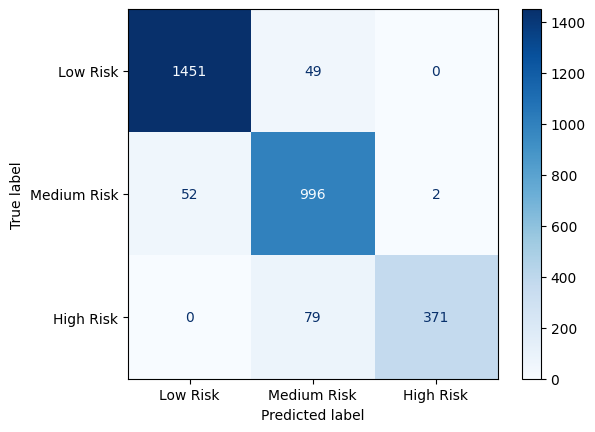

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

# Create the display object
# The display_labels are set to the actual class names for clarity
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=["Low Risk","Medium Risk","High Risk"])

# Plot the matrix
disp.plot(cmap=plt.cm.Blues) # You can change the color map
plt.show()


In [ ]:
# Looking at prediction probabilities per class
y_prob = lda.predict_proba(X_test)
print(y_prob)

[[9.45687873e-01 5.43117249e-02 4.02362343e-07]
 [4.22436954e-07 1.63646477e-02 9.83634930e-01]
 [2.58696822e-01 7.41193335e-01 1.09842878e-04]
 ...
 [9.62048263e-01 3.79517334e-02 3.52687756e-09]
 [5.83190454e-01 4.16806312e-01 3.23401661e-06]
 [9.94930909e-01 5.06909088e-03 5.00758509e-10]]


In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import (
    roc_curve, auc,
    precision_score, recall_score, f1_score
)

# True labels (binary)
y_test_binary = (y_test == 2).astype(int)

# Predicted probabilities for class 2
y_prob_high = y_prob[:, 2]

In [ ]:
# Testing various threshold values for probabilities for 2nd class and printing accuracy

thresholds = np.arange(0.1, 0.9, 0.05)

results = []

for t in thresholds:
    y_pred_thresh = (y_prob_high >= t).astype(int)

    precision = precision_score(y_test_binary, y_pred_thresh, zero_division=0)
    recall = recall_score(y_test_binary, y_pred_thresh)
    f1 = f1_score(y_test_binary, y_pred_thresh)

    results.append([t, precision, recall, f1])

results_df = pd.DataFrame(
    results,
    columns=['Threshold', 'Precision', 'Recall', 'F1_Score']
)

results_df

,Threshold,Precision,Recall,F1_Score
0,0.10,0.875256,0.951111,0.911608
1,0.15,0.910064,0.944444,0.926936
2,0.20,0.930493,0.922222,0.926339
3,0.25,0.964455,0.904444,0.933486
4,0.30,0.971014,0.893333,0.930556
5,0.35,0.977833,0.882222,0.927570
6,0.40,0.989899,0.871111,0.926714
7,0.45,0.992147,0.842222,0.911058
8,0.50,0.994638,0.824444,0.901580
9,0.55,0.994550,0.811111,0.893513


In [ ]:
# Selecting best threshold based on highest F1 score
best_row = results_df.loc[results_df['F1_Score'].idxmax()]
best_row

,3
Threshold,0.250000
Precision,0.964455
Recall,0.904444
F1_Score,0.933486


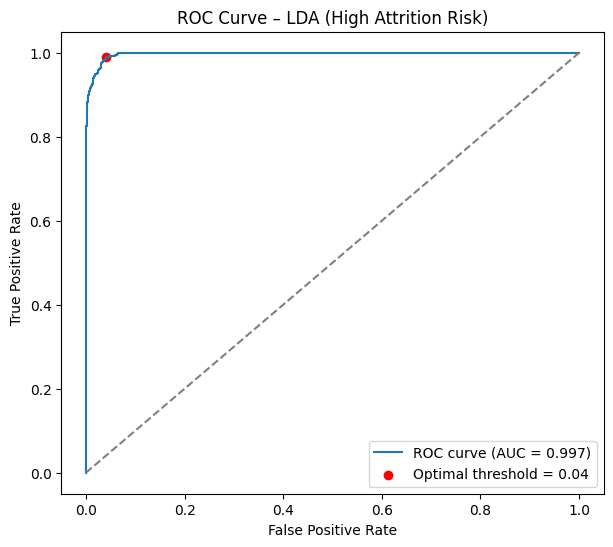

In [ ]:
# Plotting ROC curve to visualize optimal threshold
import matplotlib.pyplot as plt

fpr, tpr, roc_thresholds = roc_curve(y_test_binary, y_prob_high)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(7, 6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')

# Optimal threshold marker
optimal_idx = np.argmax(tpr - fpr)
plt.scatter(
    fpr[optimal_idx],
    tpr[optimal_idx],
    color='red',
    label=f'Optimal threshold = {roc_thresholds[optimal_idx]:.2f}'
)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve – LDA (High Attrition Risk)')
plt.legend()
plt.show()

# Quadratic Discriminative Analysis (QDA).

In [ ]:
# Fitting QDA model on same set of predictors
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score, confusion_matrix

qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train, y_train)

y_pred_qda = qda.predict(X_test)

accuracy_qda = accuracy_score(y_test, y_pred_qda)
conf_matrix_qda = confusion_matrix(y_test, y_pred_qda)

accuracy_qda, conf_matrix_qda

(0.959,
 array([[1467,   33,    0],
        [  54,  975,   21],
        [   0,   15,  435]]))

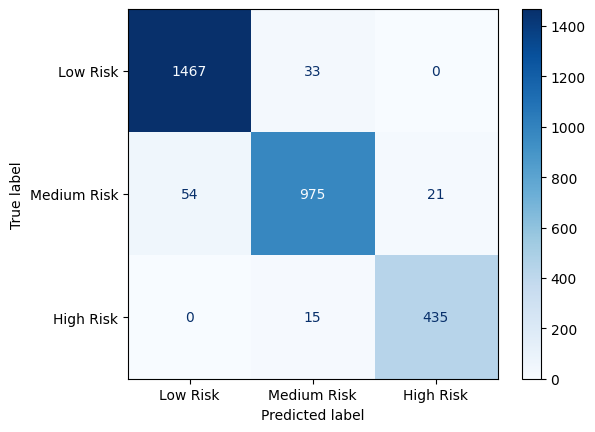

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

# Create the display object
# The display_labels are set to the actual class names for clarity
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_qda, display_labels=["Low Risk","Medium Risk","High Risk"])

# Plot the matrix
disp.plot(cmap=plt.cm.Blues) # You can change the color map
plt.show()


# Naïve Bayes


In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Train Naive Bayes
nb = GaussianNB()
nb.fit(X_train, y_train)

# Predict
y_pred_nb = nb.predict(X_test)

# Evaluation
acc_nb = accuracy_score(y_test, y_pred_nb)
conf_nb = confusion_matrix(y_test, y_pred_nb)
report_nb = classification_report(y_test, y_pred_nb)

acc_nb, conf_nb

(0.7876666666666666,
 array([[1354,  120,   26],
        [ 244,  671,  135],
        [   0,  112,  338]]))

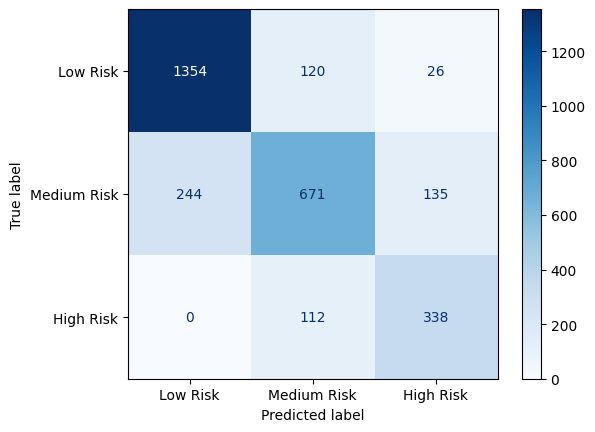

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

# Create the display object
# The display_labels are set to the actual class names for clarity
disp = ConfusionMatrixDisplay(confusion_matrix=conf_nb, display_labels=["Low Risk","Medium Risk","High Risk"])

# Plot the matrix
disp.plot(cmap=plt.cm.Blues) # You can change the color map
plt.show()


In [ ]:
print(report_nb)

              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1500
           1       0.74      0.64      0.69      1050
           2       0.68      0.75      0.71       450

    accuracy                           0.79      3000
   macro avg       0.76      0.76      0.76      3000
weighted avg       0.79      0.79      0.78      3000



# Comparsion of LR, LDA, QDA and NB Models

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

results = []

# Defining models
model_configs = [
    {
    "name": "Binary Logistic Regression (High Risk vs Others)",
    "model": res_bin,
    "type": "statsmodels_binary"
   },
    {
        "name": "Logistic Regression (with Confounding variable)",
        "model": res1,
        "features": X_multiclass1.columns,
        "type": "statsmodels"

    },
    {
        "name": "Multinomial Logistic (No Confounding variable)",
        "model": res2,
        "features": X_multiclass2.columns,
        "type": "statsmodels"
    },
    {
        "name": "LDA",
        "model": lda,
        "features": X_train.columns,
        "type": "sklearn"
    },
    {
        "name": "QDA",
        "model": qda,
        "features": X_train.columns,
        "type": "sklearn"
    },
    {
        "name": "Naive Bayes",
        "model": nb,
        "features": X_train.columns,
        "type": "sklearn"
    }
]

# Evaluation Loop
for config in model_configs:

    name = config["name"]
    model = config["model"]
    model_type = config["type"]

    if model_type == "statsmodels":

        features = model.model.exog_names
        X_test_aligned = X_test.copy()

        if 'const' in features:
            X_test_aligned = sm.add_constant(X_test_aligned)

        X_test_aligned = X_test_aligned[features]

        y_prob = model.predict(X_test_aligned)
        y_pred = np.argmax(y_prob.values, axis=1)

    elif model_type == "statsmodels_binary":

        features = model.model.exog_names
        X_test_aligned = X_test.copy()

        if 'const' in features:
            X_test_aligned = sm.add_constant(X_test_aligned)

        X_test_aligned = X_test_aligned[features]

        y_prob = model.predict(X_test_aligned)
        y_pred = (y_prob >= 0.5).astype(int)

    else:
        y_pred = model.predict(X_test)

    acc = accuracy_score(y_test_binary if "Binary" in name else y_test, y_pred)
    prec = precision_score(y_test_binary if "Binary" in name else y_test, y_pred, average="weighted")
    rec = recall_score(y_test_binary if "Binary" in name else y_test, y_pred, average="weighted")
    f1 = f1_score(y_test_binary if "Binary" in name else y_test, y_pred, average="weighted")

    results.append([name, acc, prec, rec, f1])

# Comparison Table
comparison_df = pd.DataFrame(
    results,
    columns=["Model", "Accuracy", "Precision", "Recall", "F1-Score"]
)

comparison_df.sort_values(by="Accuracy", ascending=False).round(3)

,Model,Accuracy,Precision,Recall,F1-Score
4,QDA,0.959,0.959,0.959,0.959
3,LDA,0.939,0.942,0.939,0.939
0,Binary Logistic Regression (High Risk vs Others),0.884,0.871,0.884,0.872
5,Naive Bayes,0.788,0.785,0.788,0.784
1,Logistic Regression (with Confounding variable),0.716,0.709,0.716,0.709
2,Multinomial Logistic (No Confounding variable),0.628,0.607,0.628,0.607


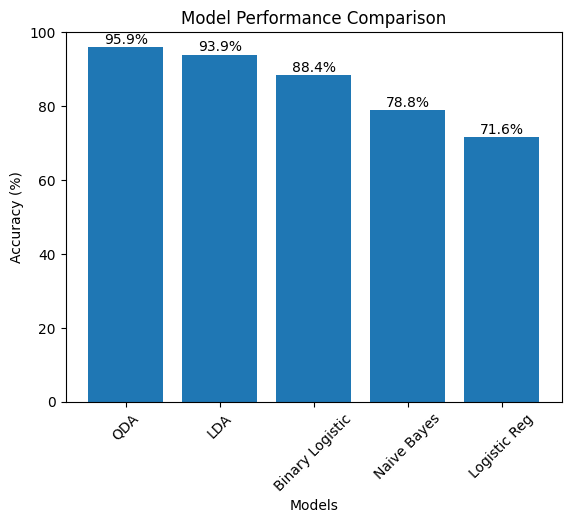

In [2]:
import matplotlib.pyplot as plt

models = ['QDA', 'LDA', 'Binary Logistic', 'Naive Bayes', 'Logistic Reg']
accuracy = [95.9, 93.9, 88.4, 78.8, 71.6]

plt.figure()
bars = plt.bar(models, accuracy)

plt.xlabel("Models")
plt.ylabel("Accuracy (%)")
plt.title("Model Performance Comparison")
plt.xticks(rotation=45)
plt.ylim(0, 100)

# add value labels
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1,
             f"{yval}%", ha='center')

plt.show()

# Comparison of Linear and Poisson Regression Models

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error

# Define Target and Predictors

# Count target variable
y_reg = df['Num_Projects']

# Select predictors
X_reg = df[['Age',
            'Monthly_Income',
            'Years_at_Company',
            'Job_Satisfaction',
            'Work_Life_Balance']]

X_reg = sm.add_constant(X_reg)


# Linear Regression (OLS)

linear_model = sm.OLS(y_reg, X_reg).fit()

print("LINEAR REGRESSION:")
print(linear_model.summary())

# Predictions
y_pred_linear = linear_model.predict(X_reg)

mse_linear = mean_squared_error(y_reg, y_pred_linear)

print("\nLinear Model MSE:", round(mse_linear, 4))
print("Linear Model AIC:", linear_model.aic)
print("Linear Model Log-Likelihood:", linear_model.llf)

LINEAR REGRESSION:
                            OLS Regression Results                            
Dep. Variable:           Num_Projects   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.8531
Date:                Mon, 23 Feb 2026   Prob (F-statistic):              0.512
Time:                        17:40:53   Log-Likelihood:                -31608.
No. Observations:               15000   AIC:                         6.323e+04
Df Residuals:                   14994   BIC:                         6.327e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              

In [ ]:
# Poisson Regression

poisson_model = sm.GLM(y_reg,
                       X_reg,
                       family=sm.families.Poisson()).fit()

print("\nPOISSON REGRESSION:")
print(poisson_model.summary())

# Predictions
y_pred_poisson = poisson_model.predict(X_reg)

mse_poisson = mean_squared_error(y_reg, y_pred_poisson)

print("\nPoisson Model MSE:", round(mse_poisson, 4))
print("Poisson Model AIC:", poisson_model.aic)
print("Poisson Model Log-Likelihood:", poisson_model.llf)


# Overdispersion Check

mean_y = y_reg.mean()
var_y = y_reg.var()

print("\nDISPERSION CHECK:")
print("Mean of Num_Projects:", round(mean_y, 4))
print("Variance of Num_Projects:", round(var_y, 4))

if var_y > mean_y:
    print("Variance > Mean → Possible overdispersion (Poisson assumption may be violated).")
else:
    print("Variance ≈ Mean → Poisson assumption reasonable.")



POISSON REGRESSION:
                 Generalized Linear Model Regression Results                  
Dep. Variable:           Num_Projects   No. Observations:                15000
Model:                            GLM   Df Residuals:                    14994
Model Family:                 Poisson   Df Model:                            5
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -31722.
Date:                Mon, 23 Feb 2026   Deviance:                       12558.
Time:                        17:40:34   Pearson chi2:                 1.19e+04
No. Iterations:                     4   Pseudo R-squ. (CS):          0.0002261
Covariance Type:            nonrobust                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const            

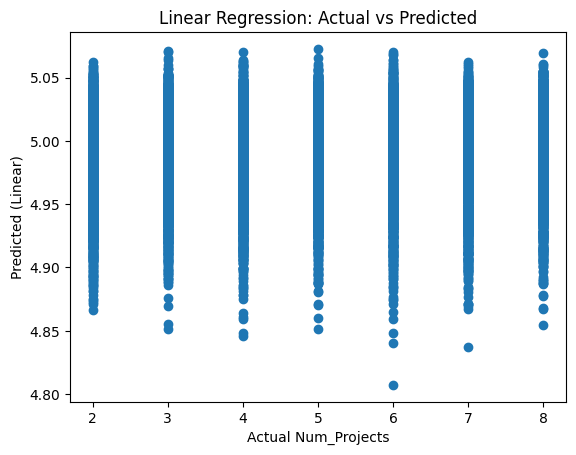

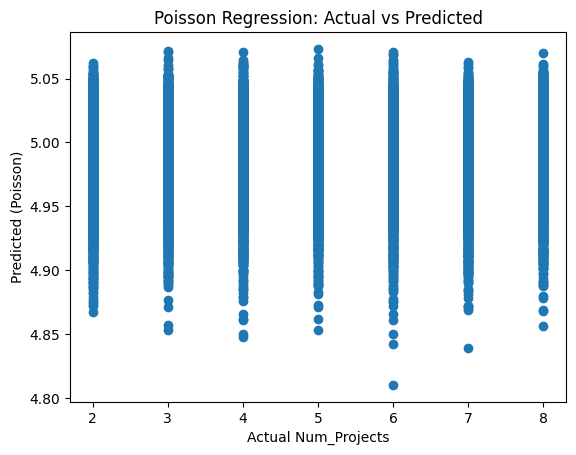

In [ ]:
import matplotlib.pyplot as plt

plt.figure()
plt.scatter(y_reg, y_pred_linear)
plt.xlabel("Actual Num_Projects")
plt.ylabel("Predicted (Linear)")
plt.title("Linear Regression: Actual vs Predicted")
plt.show()

plt.figure()
plt.scatter(y_reg, y_pred_poisson)
plt.xlabel("Actual Num_Projects")
plt.ylabel("Predicted (Poisson)")
plt.title("Poisson Regression: Actual vs Predicted")
plt.show()

Interpretation: The predicted values are clustered around the mean (~5), while actual values range from 2 to 8. This indicates that the Poisson model fails to capture meaningful variation in the number of projects.

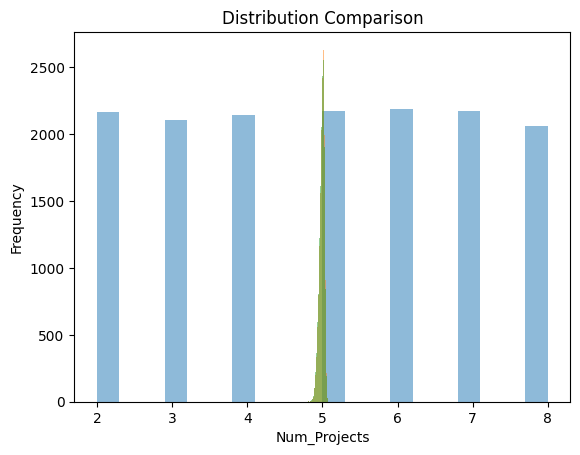

In [ ]:
plt.figure()
plt.hist(y_reg, bins=20, alpha=0.5)
plt.hist(y_pred_linear, bins=20, alpha=0.5)
plt.hist(y_pred_poisson, bins=20, alpha=0.5)

plt.title("Distribution Comparison")
plt.xlabel("Num_Projects")
plt.ylabel("Frequency")
plt.show()

Interpretation: Both models produce predictions concentrated around the mean, whereas the actual distribution shows wider variability. This suggests weak model fit and limited explanatory power.

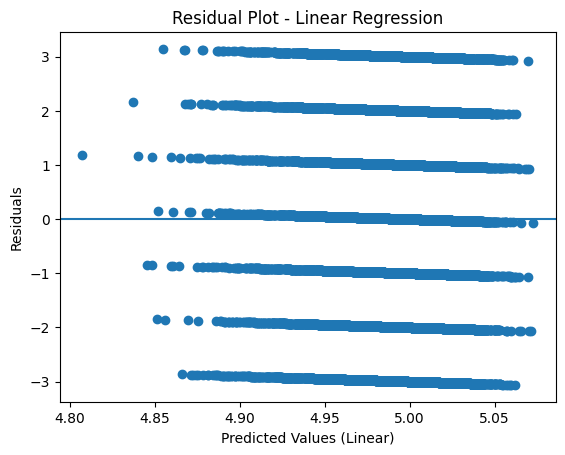

In [ ]:
residuals_linear = y_reg - y_pred_linear

plt.figure()
plt.scatter(y_pred_linear, residuals_linear)
plt.axhline(0)
plt.xlabel("Predicted Values (Linear)")
plt.ylabel("Residuals")
plt.title("Residual Plot - Linear Regression")
plt.show()

Interpretation: The residuals display a structured pattern rather than random scatter, indicating that linear regression assumptions may not hold for count data.